### Quest: Can you accurately predict insurance costs?

#### Data: Kaggle- [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

In [1]:
import numpy as np 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
import xgboost

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
Obesity=[]
def BmiToBinaryData(data):
    for row in data["bmi"]:
        if(row > 30):
            Obesity.append(1)
        else:
            Obesity.append(0)
    return Obesity

smoke=[]
def SmokerToBinaryData(data):
    for row in data["smoker"]:
        if(row=="yes"):
            smoke.append(1)
        else:
            smoke.append(0)
    return smoke

In [4]:
data["obese"]=BmiToBinaryData(data)
data = data.drop('bmi', 1)
data["smoke"]=SmokerToBinaryData(data)
data = data.drop('smoker', 1)

smoke vs charges


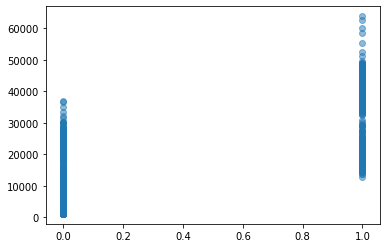

obese vs charges


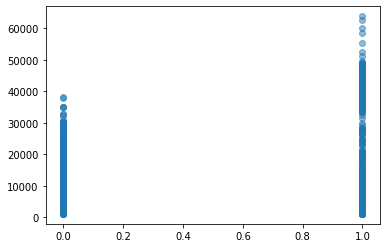

age vs charges


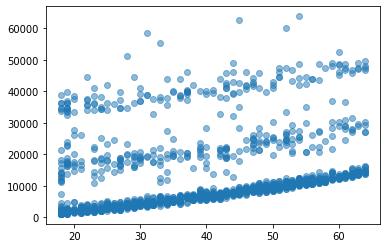

children vs charges


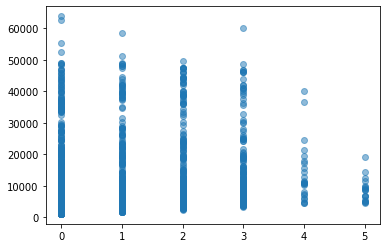

In [5]:
y=data["charges"]
for x in ["smoke","obese","age","children"]:
    print (x + " vs " + "charges")
    plt.scatter(data[x],y , alpha=0.5)
    plt.show()

In [6]:
data = data.drop('sex', 1)
data = data.drop('region', 1)
data = data.drop('children', 1)
print ("checking corelation between features")
print(data.corr())

checking corelation between features
              age   charges     obese     smoke
age      1.000000  0.299008  0.086764 -0.025019
charges  0.299008  1.000000  0.199683  0.787251
obese    0.086764  0.199683  1.000000 -0.001381
smoke   -0.025019  0.787251 -0.001381  1.000000


In [7]:
data.head()

,age,charges,obese,smoke
0,19,16884.92400,0,1
1,18,1725.55230,1,0
2,28,4449.46200,1,0
3,33,21984.47061,0,0
4,32,3866.85520,0,0


In [8]:
x = data.drop('charges',1)
y = data["charges"]
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print("XGBoost Prediction Score - " + str(explained_variance_score(predictions,y_test)))

[19:55:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Prediction Score - 0.8314074922847365


C:\Users\Kerry\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [9]:
d = {'age': [31], 'obese': [1], 'smoke':[1]}
df = pd.DataFrame(data=d)
print (df)
print("predict insurance premium cost - ")
print(xgb.predict(df))

   age  obese  smoke
0   31      1      1
predict insurance premium cost - 
[44902.77]
